<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Nuevos/Copy1_CEQ_Grcev_2ramas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada Presentación

**Nombres:** 


Jaime A. Valencia V.


**Email:**

jalejandro.valencia@udea.edu.co


**Proyecto Hidrocol**

Circuito equivalente Grcev_2005 de dos ramas (L1-R1!C1)-(L2-R2!C2)
Resultados con medidas del 22 de noviembre.

**Fecha:**
Jueves 2022-dic-08

# Descripción

**Objetivos**

PRUEBA INCIAL CON DATOS GENERADOS EN LA SOLUCION DE LA EDO 2022-DIC-08


Presentación de la metodologia de ajuste de parametros en una ecuacion diferencial ordinario. 
paper Grcev_2005  fig. 1(d). caso 2 ramas

Se usa la funcion minimize() de scipy.optimization para ajustar parametros


**Desarrollo**



1.   Solucion de EDO usando odeint()
2.   Programacion funcion de Error
3.   Programacion grafico error
4.   Optimizacion de parametros



La imagen muestra la metodologia a seguir para realizar el ajuste de parametros.
Para este caso el ajuste es de 6 parametros (R1,L1,C1,R2,L2,C2) y asumimos fuente de corriente.

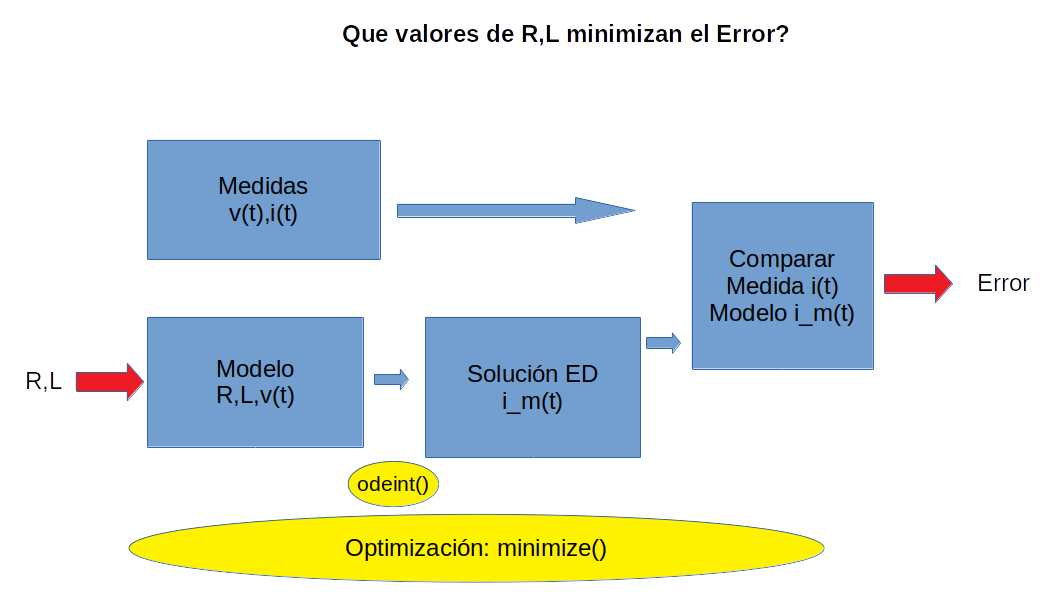

# Modulos principales

Importacion de modulo principales de trabajo en Metodos Numericos.

In [1]:
import pylab as plt
import matplotlib
import numpy as np
import scipy as SC
import sympy as SP

Observacion de las versiones de los modulos importados.

In [ ]:
print("Version numpy: ",np.__version__)
print("Version Matplotlib: ",matplotlib.__version__)
print("Version scipy: ", SC.__version__)
print("Version sympy: ",  SP.__version__)

Version numpy:  1.21.6
Version Matplotlib:  3.2.2
Version scipy:  1.4.1
Version sympy:  1.7.1


# Solucion de EDO usando odeint()

## programacion funcion ode(CEQ_Grcev_2r)

In [5]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint #funcion para solucion EDO

##funcion de la ecuacion diferencia
##NUEVO BASE CIRCUITO GRECV L1 serie(R1 paralelo C1)+ L2 serie(R2 paralelo C2)
def CEQ_Grcev_2r(Z, t, R1=20, L1=0.1e-3, C1=0.1e-6,  R2=20, L2=0.1e-3, C2=0.1e-6, Fv= lambda x:1.0 ):
    """Z: funcion vectorial dependiente de t
       t: variable independiente
       Funcion para solucion del circuito
       
       di_1/dt = (1/L1) (Fv - vc_1) 
       dvc_1/dt = (1/C1)(i_1 - i_2 - vc_1/R1)
       di_2/dt = (1/L2)(vc_1 - vc_2) 
       dvc_2/dt = (1/C2)(i_2 - vc_2/R2)
       Z = [i_1, vc_1, i_2, vc_2]
       
    """
    # voltaje en voltios
    # RT en ohmios
    # LT en Henrios
    # CT en Faradios

    Vf = Fv(t) ##evaluacion de la funcion 
     
    i_1 = Z[0] #corriente del circuito
    vc_1= Z[1] #voltaje en condensador 1
    i_2 = Z[2] #corriente L2
    vc_2= Z[3] #voltaje en condensador 2

    di_1 = (1/L1)*(Vf - vc_1)
    dvc_1= (1/C1)*(i_1 - i_2 - (vc_1/R1) )
    di_2 = (1/L2)*(vc_1 - vc_2)
    dvc_2= (1/C2)*(i_2 - (vc_2/R2) )
    
    return [di_1, dvc_1, di_2, dvc_2]



## Solucion EDO

In [6]:
#Definir parametros
from scipy import interpolate
##funcion de voltaje al circuito
F_in = interpolate.interp1d([0,10e-6,350e-6,1e-3], [0,1,0.5,0.1])

##Parametros del circuito
r1,l1,c1,r2,l2,c2 = [3.5, .1e-3, .1e-6, 3.5*2, 0.1e-3/2, 0.1e-6/2]

#definir condicion inicial
Z0= [0.0, 0.0, 0.0, 0.0]#I1, Vc1, I2, Vc2
print('cond. inicial (cir): ', Z0)

##definir rango de solucion
t_inicial = 0
t_final= 0.0007
T = np.linspace(t_inicial, t_final, 200)

print('Solucion entre ',t_inicial,' y ',t_final, 'segundos')

##Solucionar la ED
y_sol = odeint(CEQ_Grcev_2r, Z0, T,(r1,l1,c1,r2,l2,c2, F_in))##f(i,t),Condic inic, tiempo,argumetos


cond. inicial (cir):  [0.0, 0.0, 0.0, 0.0]
Solucion entre  0  y  0.0007 segundos


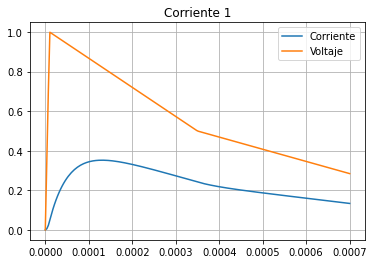

In [7]:
##GRAFICO SOLUCION
plt.plot(T,y_sol[:,0],T,F_in(T))
plt.title("Corriente 1")
plt.grid("on")
plt.legend(["Corriente","Voltaje"])

# Lectura de datos

In [9]:
##Lectura de datos
#Lectura de datos de entrada de la simulacion en funcion del tiempo

V_datos = np.genfromtxt("V_22nov_med_6.txt", delimiter=";")
I_datos = np.genfromtxt("I_22nov_med_6.txt", delimiter=";")

#Grafico (Datos leidos)

Numero datos:  212


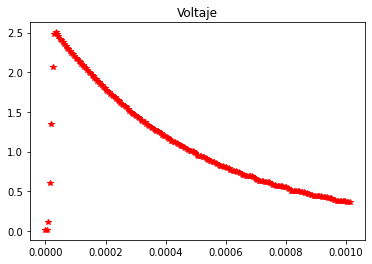

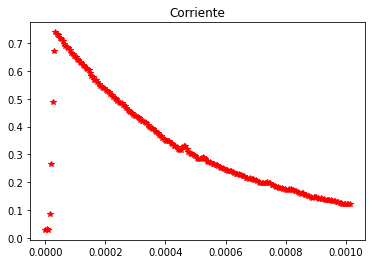

In [31]:
##REEMPLAZO DE DATOS#######
##observacion
STEP = 300 ##recote de datos para ajuste mas rapido

T = V_datos[::STEP,0]
y_volt = V_datos[::STEP,1]
y_cur = I_datos[::STEP,1]

print("Numero datos: ",len(T))
plt.figure(1)
plt.plot(T,y_volt,"r*")
plt.title("Voltaje")
plt.show()

plt.figure(2)
plt.plot(T, y_cur,"r*")
plt.title("Corriente")
plt.show()


# Problema de optimizacion

Paso1. Crear funcion de error.

Paso2. Minimizar la funcion de error.


Caso sin restriccion
[minimize()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)

## Programacion funcion Error(F_error_CEQ_G2r)

In [11]:
##funcion Error que calcula la diferencia
## entre los datos y el modelo
## variable :R1, L1, C1, R2, L2, C2
## datos entrada: v(t), i(t)
## Calculo: error cuadratico promedio

def F_error_CEQ_G2r(X, D_tiempo, D_voltios, D_amps):
    """X = [R1,L1,C1,R2,L2,C2] en Ohms y Henrios
       D_tiempo: lista de instantes de tiempo
       D_voltios: Lista de valores de voltaje(t) medidos
       D_amps: Lista de valores de corriente(t) medidos.
       La funcion calcula el error cuadratico medio entre
       el resultado de la solucion de la ecuacion diferencia
       con los parametros R1,L1,C1,R2,L2,C2 y los respectivos valores 
       de la corriente medidos.
    """
    R_1,L_1,C_1,R_2,L_2,C_2  = X #parametros del circuito que entran
    Z0= [0.0, 0.0, 0.0, 0.0]#I1, Vc1, I2, Vc2
   
    V_fuente = lambda xx: np.interp(xx,D_tiempo,D_voltios)

    S_modelo = odeint(CEQ_Grcev_2r, Z0, D_tiempo,(R_1,L_1,C_1,R_2,L_2,C_2, V_fuente))#Solucion EDO
    I_t = S_modelo[:,0]
    ##calculo del voltaje a la entrada en modelo
    Suma=0
    NN = len(S_modelo)
    for q in range(NN):
        ei = (I_t[q]- D_amps[q])**2
        Suma = Suma + ei
    error = Suma/NN## suma error cuadratico medio
    
    return error


In [12]:
#Evaluando la funcion de error
X0 = [3.5, .1e-3, .1e-6, 3.5*2, 0.1e-3/2, 0.1e-6/2]##Datos: R1,L1,C1,R2,L2,C2
F_error_CEQ_G2r(X0, T, y_volt, y_cur)

0.03196567697078272

## Comparacion grafica(F_Show_error_CEQ_G2r)

In [33]:
##funcion Error que calcula la diferencia
## entre los datos y el modelo
## variable : R1,L1,C1,R2,L2,C2
## datos entrada: v(t), i(t)
## Calculo: error cuadratico promedio

def F_Show_error_CEQ_G2r(X, D_tiempo, D_voltios, D_amps):
    """X = [R1,L1,C1,R2,L2,C2] en Ohms y Henrios
       D_tiempo: lista de instantes de tiempo
       D_voltios: Lista de valores de voltaje(t) medidos
       D_amps: Lista de valores de corriente(t) medidos.
       La funcion calcula el error cuadratico medio entre
       el resultado de la solucion de la ecuacion diferencia
       con los parametros R1,L1,C1,R2,L2,C2 y los respectivos valores 
       de la corriente medidos.
    """
    R_1,L_1,C_1,R_2,L_2,C_2  = X #parametros del circuito que entran
    Z0= [0.0, 0.0, 0.0, 0.0]#I1, Vc1, I2, Vc2
   
    V_fuente = lambda xx: np.interp(xx,D_tiempo,D_voltios)

    S_modelo = odeint(CEQ_Grcev_2r, Z0, D_tiempo,(R_1,L_1,C_1,R_2,L_2,C_2, V_fuente))#Solucion EDO
    I_t = S_modelo[:,0]
    ##calculo del voltaje a la entrada en modelo
    Suma=0
    NN = len(S_modelo)
    for q in range(NN):
        ei = (I_t[q]- D_amps[q])**2
        Suma = Suma + ei
    error = Suma/NN## suma error cuadratico medio
     
    print("Error Cuadratico Medio= ",error)
    plt.plot(D_tiempo,D_amps,"ro")
    plt.plot(D_tiempo, I_t,"b*-")
    plt.legend(["Datos","Modelo"])
    plt.grid("on")
    plt.show()
    return error


Error Cuadratico Medio=  0.0005595263197368863


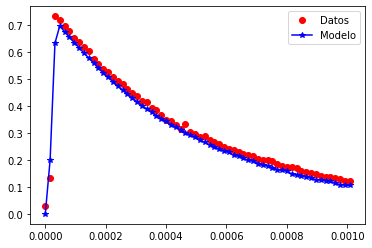

0.0005595263197368863

In [25]:
X0 = [7.0, .01e-3, .1e-6, 7, 0.01e-3, 0.1e-6]##Datos: R1,L1,C1,R2,L2,C2
F_Show_error_CEQ_G2r(X0, T, y_volt, y_cur)

##Funcion minimize

Ajuste de parametros usando optimizacion de la funcion de error cuadratico medio.
Se usan cotas para que los valores sehan positivos.

In [26]:
from scipy.optimize import minimize

## aplicando un funcion de optimizacion
X0 = [7.0, .01e-3, .1e-6, 7, 0.01e-3, 0.1e-6]##Datos: R1,L1,C1,R2,L2,C2

##Cotas R1,L1,C1,R2,L2,C2
Lim_low = 1e-10
bnds = ((Lim_low, 100), (Lim_low,1), (Lim_low,1),(Lim_low, 100), (Lim_low,1), (Lim_low,1)) #Cotas parametros

res = minimize(F_error_CEQ_G2r,X0,args=(T, y_volt, y_cur),
               method='Nelder-Mead',bounds=bnds, tol=1e-5)#method="Powell"),


print("Valores R1,L1,C1,R2,L2,C2: ",res.x)

print("Error minimo: ",res.fun)



Valores R1,L1,C1,R2,L2,C2:  [6.96321951e+00 8.00605049e-06 1.42245343e-07 6.41206442e+00
 7.45091106e-06 1.40343968e-07]
Error minimo:  0.0002411639772740437


##Validacion

Error Cuadratico Medio=  0.00010704707932994445


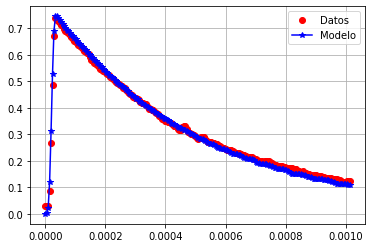

0.00010704707932994445

In [34]:
##Validacion resultados
F_error_CEQ_G2r(res.x, T, y_volt, y_cur)
F_Show_error_CEQ_G2r(res.x, T, y_volt, y_cur)

# Resultados y conclusiones

**Conclusiones:**

Buen resultado aproximando la solucion del caso inicial de prueba.

Es interesante que los valores no son iguales. LA SOLUCION DE APROXIMACION DE PARAMETROS NO NECESARIAMENTE ES UNICA.






**Resultados:**


**Referencias:**



*Libros*

[Numerical Computing with MATLAB
Copyright 2004, Cleve Moler. Introd.](https://www.mathworks.com/content/dam/mathworks/mathworks-dot-com/moler/intro.pdf)

[Burde & Faires](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EQd1_32TgMhCh8MBU0FqxpIBSIjxSMEJKAcVIVyvYZHSng?e=nrWw8z)

[Chapra & Canale](https://udeaeduco.sharepoint.com/:b:/s/MtodosNumricos_2022-1/EZgs5MpMDKtLpAZlwGEmn9oB3FvpAGncvlnWPcZ9wRNhIg?e=fPcsyf)





[scipy-interpolate 1.8.1](https://docs.scipy.org/doc/scipy/tutorial/interpolate.html#)  [1.4.1](https://docs.scipy.org/doc/scipy-1.4.1/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d)

[2017-marzo-15 Prezi](http://numericalmethodsie20152udea.blogspot.com/2017/03/interpolacion-ajuste-y-procesamieto-de.html)

[Guia Burden y Chapra](http://numericalmethodsie20152udea.blogspot.com/2017/03/documentacion-interpolacion-y-ajuste.html)

[2016-sep-14](http://numericalmethodsie20152udea.blogspot.com/2016/09/ajuste-de-funcion-no-lineal.html)

[2016-sep-7](http://numericalmethodsie20152udea.blogspot.com/2016/09/interpolacion-y-ajuste-de-datos.html)